# __Comparative study of Q LEARNING - SARSA on Frozen Lake Problem__ #

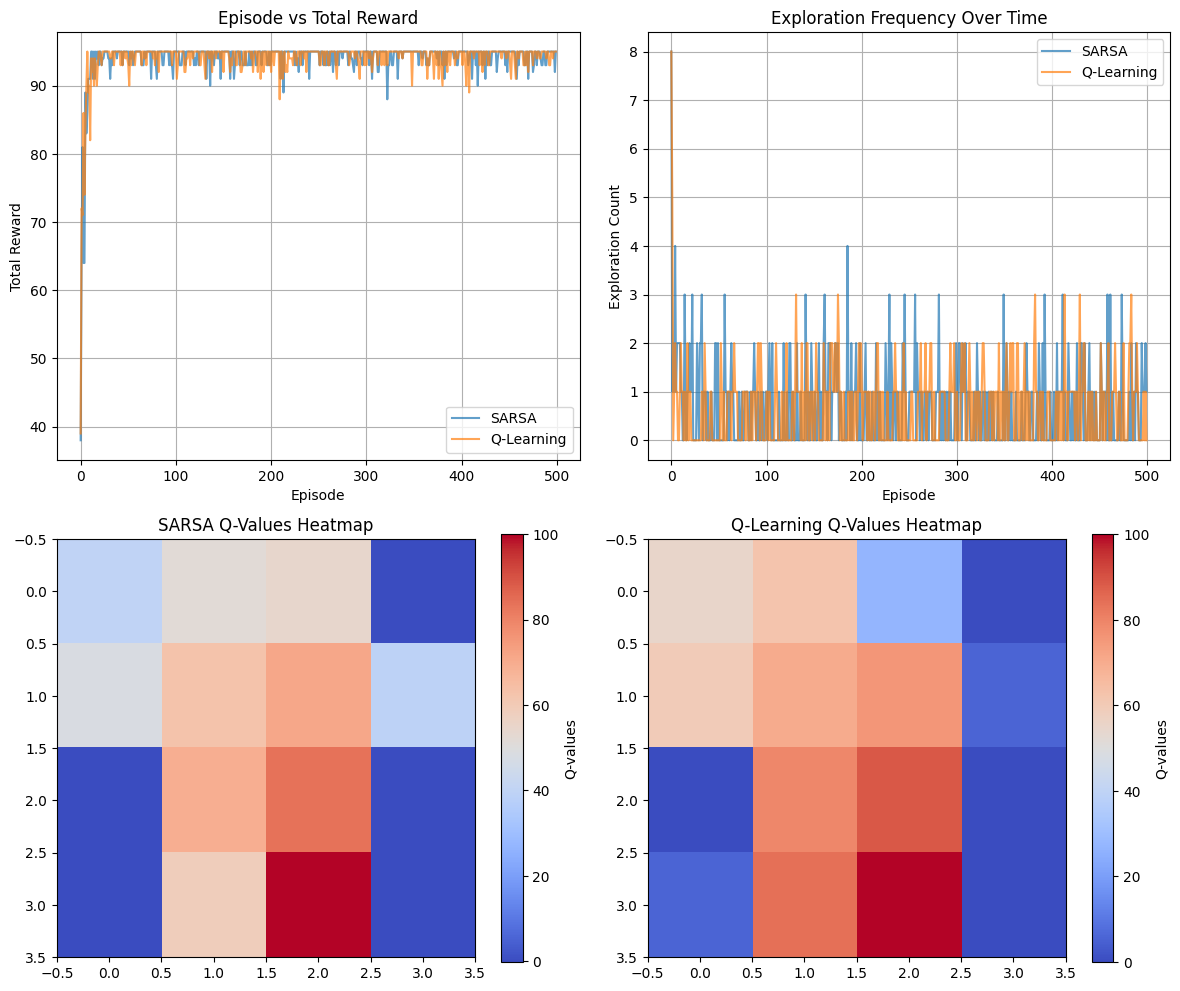

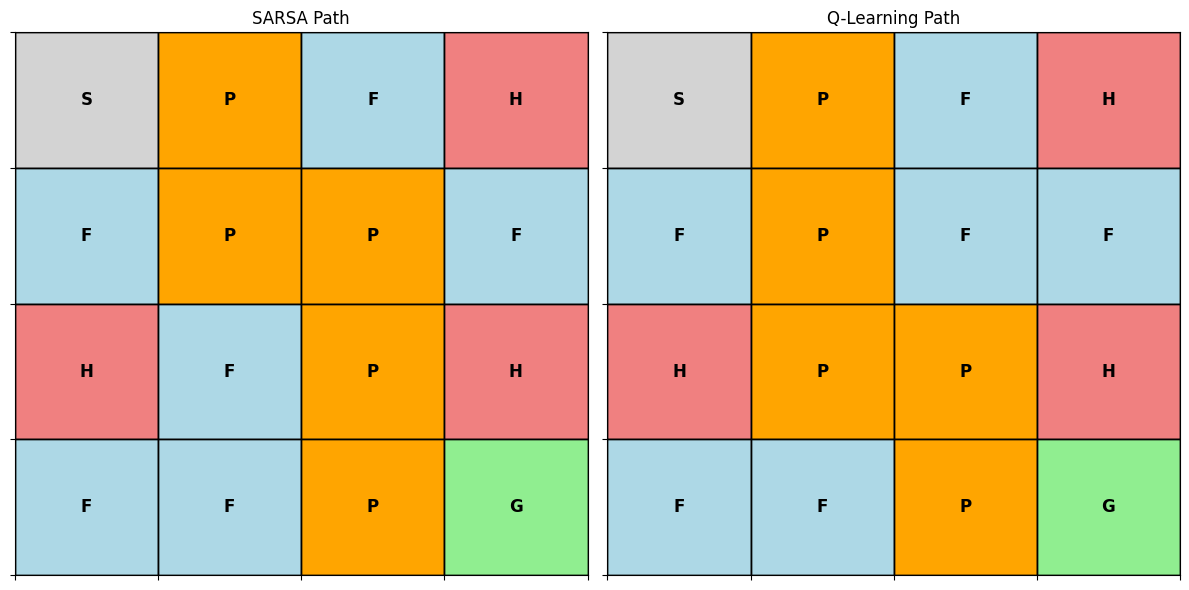

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Frozen Lake Grid dimensions and parameters
GRID_SIZE = 4
ALPHA = 0.1
GAMMA = 0.9
EPSILON = 0.1
EPISODES = 500

# Initialize Q-tables
q_table_sarsa = np.zeros((GRID_SIZE, GRID_SIZE, 4))
q_table_qlearning = np.zeros((GRID_SIZE, GRID_SIZE, 4))

# Actions: [up, down, left, right]
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

# Rewards and obstacles
goal = (3, 3)
start = (0, 0)

# Generate random holes avoiding start and goal
num_holes = 3
holes = set()
while len(holes) < num_holes:
    hole = (random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1))
    if hole != start and hole != goal:
        holes.add(hole)
holes = list(holes)

reward_grid = np.full((GRID_SIZE, GRID_SIZE), -1)
reward_grid[goal] = 100
for hole in holes:
    reward_grid[hole] = -100

def is_valid_state(x, y):
    return 0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE and (x, y) not in holes

def choose_action(state, q_table, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, 3)  # Random action (exploration)
    else:
        x, y = state
        return np.argmax(q_table[x, y])  # Best action (exploitation)

# Training variables
episode_rewards_sarsa, episode_rewards_qlearning = [], []
exploration_count_sarsa, exploration_count_qlearning = [], []

for episode in range(EPISODES):
    state_sarsa = state_qlearning = start
    action_sarsa = choose_action(state_sarsa, q_table_sarsa, EPSILON)

    total_reward_sarsa, total_reward_qlearning = 0, 0
    exp_count_sarsa, exp_count_qlearning = 0, 0

    # SARSA Training
    while state_sarsa != goal:
        x, y = state_sarsa
        dx, dy = actions[action_sarsa]
        next_state = (x + dx, y + dy) if is_valid_state(x + dx, y + dy) else state_sarsa

        reward = reward_grid[next_state]
        total_reward_sarsa += reward
        next_action = choose_action(next_state, q_table_sarsa, EPSILON)

        # SARSA Update
        next_x, next_y = next_state
        q_table_sarsa[x, y, action_sarsa] += ALPHA * (
            reward + GAMMA * q_table_sarsa[next_x, next_y, next_action] - q_table_sarsa[x, y, action_sarsa]
        )

        state_sarsa, action_sarsa = next_state, next_action
        if random.uniform(0, 1) < EPSILON:
            exp_count_sarsa += 1

    episode_rewards_sarsa.append(total_reward_sarsa)
    exploration_count_sarsa.append(exp_count_sarsa)

    # Q-Learning Training
    while state_qlearning != goal:
        x, y = state_qlearning
        action = choose_action(state_qlearning, q_table_qlearning, EPSILON)
        dx, dy = actions[action]
        next_state = (x + dx, y + dy) if is_valid_state(x + dx, y + dy) else state_qlearning

        reward = reward_grid[next_state]
        total_reward_qlearning += reward

        next_x, next_y = next_state
        best_next_action = np.argmax(q_table_qlearning[next_x, next_y])

        # Q-learning Update
        q_table_qlearning[x, y, action] += ALPHA * (
            reward + GAMMA * q_table_qlearning[next_x, next_y, best_next_action] - q_table_qlearning[x, y, action]
        )

        state_qlearning = next_state
        if random.uniform(0, 1) < EPSILON:
            exp_count_qlearning += 1

    episode_rewards_qlearning.append(total_reward_qlearning)
    exploration_count_qlearning.append(exp_count_qlearning)

# Visualization Functions
def plot_path(ax, q_table, title):
    path = []
    state = start
    visited = set()
    while state != goal:
        if state in visited:
            break
        visited.add(state)
        x, y = state
        action = np.argmax(q_table[x, y])
        dx, dy = actions[action]
        next_state = (x + dx, y + dy)
        if next_state == state or not is_valid_state(*next_state):
            break
        path.append(next_state)
        state = next_state

    ax.set_xticks(range(GRID_SIZE + 1))
    ax.set_yticks(range(GRID_SIZE + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, which="major", color="black", linestyle="-", linewidth=1)
    ax.invert_yaxis()

    colors = {"S": "lightgrey", "G": "lightgreen", "H": "lightcoral", "P": "orange", "F": "lightblue"}

    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if (i, j) == start:
                label = "S"
            elif (i, j) == goal:
                label = "G"
            elif (i, j) in holes:
                label = "H"
            elif (i, j) in path:
                label = "P"
            else:
                label = "F"

            ax.add_patch(plt.Rectangle((j, i), 1, 1, color=colors[label], ec="black"))
            ax.text(j + 0.5, i + 0.5, label, ha='center', va='center', fontsize=12, fontweight='bold', color='black')

    ax.set_title(title)

# Plot Comparative Graphs
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.plot(episode_rewards_sarsa, label="SARSA", alpha=0.7)
plt.plot(episode_rewards_qlearning, label="Q-Learning", alpha=0.7)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Episode vs Total Reward')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(exploration_count_sarsa, label="SARSA", alpha=0.7)
plt.plot(exploration_count_qlearning, label="Q-Learning", alpha=0.7)
plt.xlabel('Episode')
plt.ylabel('Exploration Count')
plt.title('Exploration Frequency Over Time')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.imshow(np.max(q_table_sarsa, axis=2), cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Q-values")
plt.title("SARSA Q-Values Heatmap")

plt.subplot(2, 2, 4)
plt.imshow(np.max(q_table_qlearning, axis=2), cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Q-values")
plt.title("Q-Learning Q-Values Heatmap")

plt.tight_layout()
plt.show()

# Side-by-side Path Visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_path(axes[0], q_table_sarsa, "SARSA Path")
plot_path(axes[1], q_table_qlearning, "Q-Learning Path")
plt.tight_layout()
plt.show()